##### Exercício 4
Considere um problema de classificação de padrões constituído de oito padrões. A
distribuição dos padrões forma um círculo centrado na origem de raio unitário e contido no
círculo um losango também centrado na origem e com lados iguais a raiz de 2. Os dados das
classe C1, C2, C3, C4 corresponde aos quatro setores do losango e as outras quatro classes
correspondem aos setores delimitados pelo círculo e os lados do losango. Após gerar
aleatoriamente dados que venham formar estas distribuições de dados, selecione um conjunto
de treinamento e um conjunto de validação. Treine uma rede perceptron para classificar os
padrões associados a cada uma das classes. Verifique o desempenho do classificador usando
o conjunto de validação e calculando a matriz de confusão.


## Geração de dados

/home/victor/.conda/envs/tensorflow/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


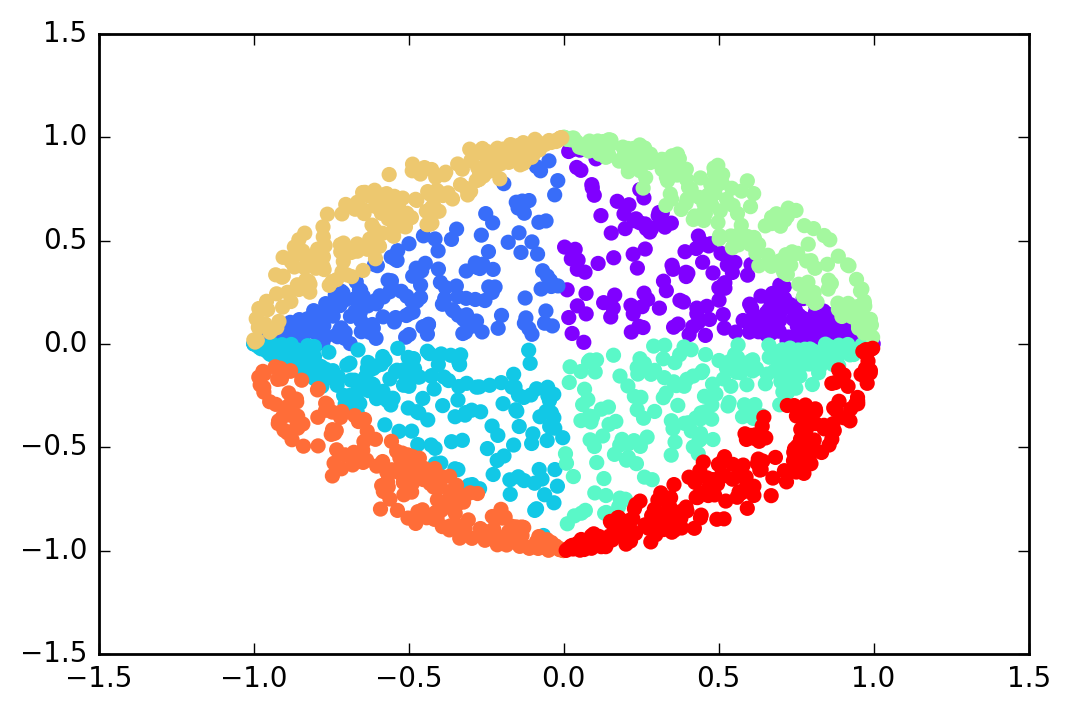

In [8]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.utils import shuffle

import random
from math import sqrt

def generate_c1(num_instances):
    points = []
    for i in range(num_instances):
        x = random.uniform(0, 1)
        y = random.uniform(0, 1 - x)
        points.append([x, y, 0])
    return points

def generate_c2(num_instances):
    points = []
    for i in range(num_instances):
        x = random.uniform(-1, 0)
        y = random.uniform(0, x + 1)
        points.append([x, y, 1])
    return points

def generate_c3(num_instances):
    points = []
    for i in range(num_instances):
        x = random.uniform(-1, 0)
        y = random.uniform(-1-x, 0)
        points.append([x, y, 2])
    return points

def generate_c4(num_instances):
    points = []
    for i in range(num_instances):
        x = random.uniform(0, 1)
        y = random.uniform(-1+x, 0)
        points.append([x, y, 3])
    return points

def generate_c5(num_instances):
    points = []
    for i in range(num_instances):
        x = random.uniform(0, 1)
        y = random.uniform(1 - x, sqrt(1 - x**2))
        points.append([x, y, 4])
    return points

def generate_c6(num_instances):
    points = []
    for i in range(num_instances):
        x = random.uniform(-1, 0)
        y = random.uniform(x+1, sqrt(1 - x**2))
        points.append([x, y, 5])
    return points

def generate_c7(num_instances):
    points = []
    for i in range(num_instances):
        x = random.uniform(-1, 0)
        y = random.uniform(-sqrt(1 - x**2), -1-x)
        points.append([x, y, 6])
    return points

def generate_c8(num_instances):
    points = []
    for i in range(num_instances):
        x = random.uniform(0, 1)
        y = random.uniform(-sqrt(1 - x**2), -1+x)
        points.append([x, y, 7])
    return points

def generate(num_instances):
    points = generate_c1(num_instances) + generate_c2(num_instances) + generate_c3(num_instances) + generate_c4(num_instances) + generate_c5(num_instances) + generate_c6(num_instances) + generate_c7(num_instances) + generate_c8(num_instances)
    return points

def one_hot_encode(x):
    one_hot = np.zeros([len(x), 8])
    for i in enumerate(x):
        one_hot[(i[0], i[1])] = 1
    return one_hot

colors = cm.rainbow(np.linspace(0, 1, 8))

res = generate(200)

data_X = [[row[0], row[1]] for row in res]
data_X = np.array(data_X)
data_y = [row[2] for row in res]
data_y = np.array(data_y)

plt.scatter(data_X[:,0], data_X[:,1], color=colors[data_y])

plt.legend()
_ = plt.ylim()

data_X, data_y = shuffle(data_X, data_y, random_state=0)

data_y = one_hot_encode(data_y)

train_X, val_X = np.split(data_X, 2)
train_y, val_y = np.split(data_y, 2)

val_X, test_X = np.split(val_X, 2)
val_y, test_y = np.split(val_y, 2)

### Demonstração da geração de dados

In [3]:
print('{0} => {1}'.format(train_X[0], train_y[0]))
print('{0} => {1}'.format(train_X[1], train_y[1]))
print('{0} => {1}'.format(train_X[2], train_y[2]))

[-0.37548679  0.63814755] => [0. 0. 0. 0. 0. 1. 0. 0.]
[-0.03313174  0.73484513] => [0. 1. 0. 0. 0. 0. 0. 0.]
[ 0.69219336 -0.3341547 ] => [0. 0. 0. 0. 0. 0. 0. 1.]


## Rede Neural

Training the model...
Epoch 0 | Batch 0 | Train Loss: 411.52356 | Validation Loss: 213.70279
Epoch 1 | Batch 0 | Train Loss: 381.69635 | Validation Loss: 198.97815
Epoch 2 | Batch 0 | Train Loss: 354.78867 | Validation Loss: 185.61102
Epoch 3 | Batch 0 | Train Loss: 331.01266 | Validation Loss: 173.69843
Epoch 4 | Batch 0 | Train Loss: 308.9086 | Validation Loss: 162.58392
Epoch 5 | Batch 0 | Train Loss: 289.03058 | Validation Loss: 152.43478
Epoch 6 | Batch 0 | Train Loss: 270.6873 | Validation Loss: 143.11406
Epoch 7 | Batch 0 | Train Loss: 254.20715 | Validation Loss: 134.61166
Epoch 8 | Batch 0 | Train Loss: 238.92322 | Validation Loss: 126.67745
Epoch 9 | Batch 0 | Train Loss: 224.80301 | Validation Loss: 119.369156
Epoch 10 | Batch 0 | Train Loss: 211.33755 | Validation Loss: 112.391495
Epoch 11 | Batch 0 | Train Loss: 198.96297 | Validation Loss: 105.89967
Epoch 12 | Batch 0 | Train Loss: 187.30635 | Validation Loss: 99.78041
Epoch 13 | Batch 0 | Train Loss: 176.37418 | Validati

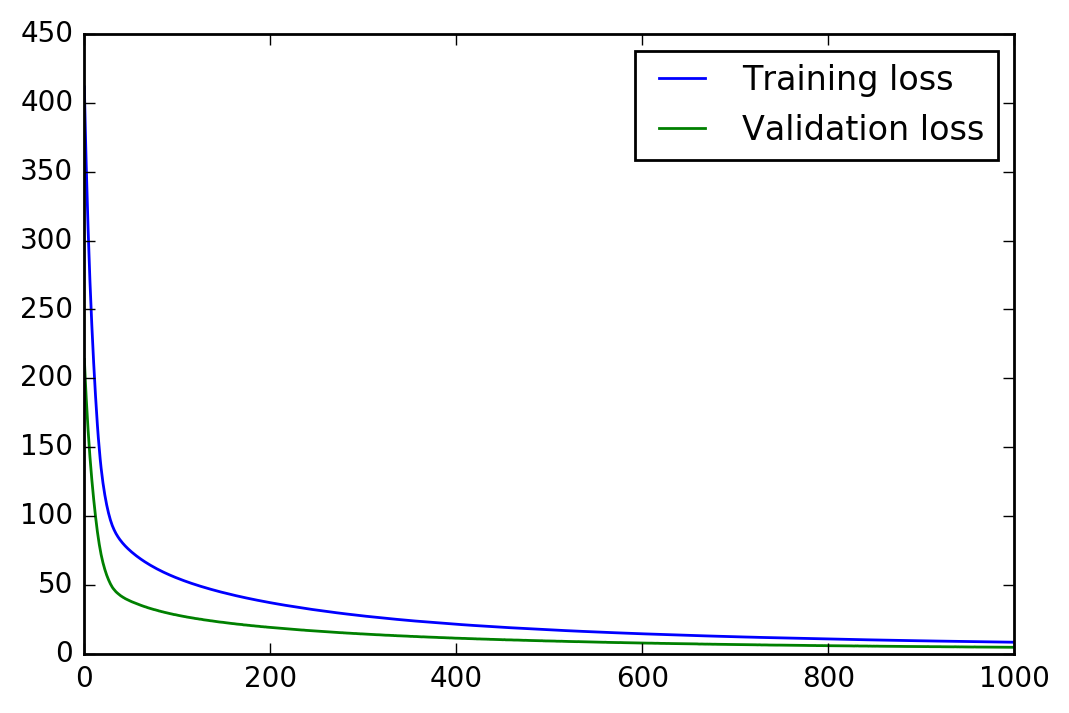

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

RANDOM_SEED = 42
tf.set_random_seed(RANDOM_SEED)

tf.reset_default_graph()

learning_rate = 0.01
epoch = 1000
interval = 50
batch_size = 50
n_batches = train_X.shape[0]//batch_size

# Layer's sizes
x_size = train_X.shape[1]   # Number of input nodes: 3 features and 1 bias
h_size = 20                 # Number of hidden nodes
y_size = train_y.shape[1]   # Number of outcomes (8 classes)

# Symbols
X = tf.placeholder(tf.float32, shape=[None, x_size], name='X')
y = tf.placeholder(tf.float32, shape=[None, y_size], name='y')

# Weight initializations
w1 = tf.Variable(tf.random_normal(shape=(x_size, h_size)))
b1 = tf.Variable(tf.random_normal(shape=[h_size]))
w2 = tf.Variable(tf.random_normal(shape=(h_size, y_size)))
b2 = tf.Variable(tf.random_normal(shape=[y_size]))

# Operations
hidden_output = tf.nn.tanh(tf.add(tf.matmul(X, w1), b1))
final_output = tf.nn.softmax(tf.add(tf.matmul(hidden_output, w2), b2), name='final_output')

# Cost Function
loss = tf.reduce_mean(-tf.reduce_sum(y * tf.log(final_output), axis=0))

# Optimizer
optimizer = tf.train.AdamOptimizer().minimize(loss)

# Add ops to save and restore all the variables.
saver = tf.train.Saver()

# Run SGD
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

# Training
print('Training the model...')
losses = {'train':[], 'validation':[]}

for e in range(epoch):
    idxs = np.random.permutation(train_X.shape[0]) #shuffled ordering
    random_X = train_X[idxs]
    random_y = train_y[idxs]
    for i in range(n_batches):
        batch_X = random_X[i * batch_size:(i+1) * batch_size]
        batch_y = random_y[i * batch_size:(i+1) * batch_size]
        sess.run(optimizer,feed_dict = {X: batch_X, y:batch_y})
        
        if i % interval == 0:
            train_loss = sess.run(loss, feed_dict={X: train_X, y: train_y})
            val_loss   = sess.run(loss, feed_dict={X: val_X, y: val_y})
            print('Epoch', e, '|',
                  'Batch', i, '|',
                  'Train Loss:', train_loss , '|',
                  'Validation Loss:', val_loss)
            losses['train'].append(train_loss)
            losses['validation'].append(val_loss)

save_path = saver.save(sess, './model/my_test_model4',global_step=1000)
print("Model saved in path: %s" % save_path)
sess.close()

plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
_ = plt.ylim()

## Testando a Rede

INFO:tensorflow:Restoring parameters from ./model/my_test_model4-1000
Accuracy: 0.9775
Confusion Matrix:
[[52  0  0  0  1  0  0  0]
 [ 0 44  1  0  0  0  0  0]
 [ 0  0 46  0  0  0  0  0]
 [ 1  0  0 49  0  0  0  1]
 [ 2  0  0  0 57  0  0  0]
 [ 0  2  0  0  0 48  0  0]
 [ 0  0  1  0  0  0 46  0]
 [ 0  0  0  0  0  0  0 49]]


/home/victor/.conda/envs/tensorflow/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


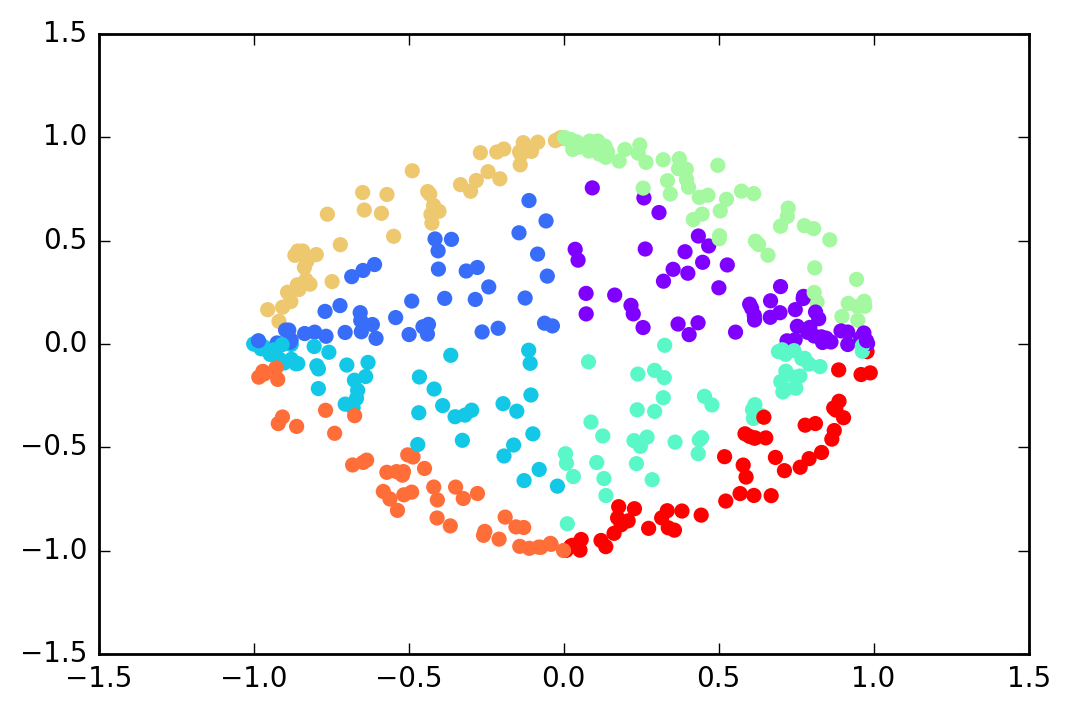

In [9]:
from sklearn.metrics import confusion_matrix

# Import model
with tf.Session() as sess:    
    saver = tf.train.import_meta_graph('./model/my_test_model4-1000.meta')
    saver.restore(sess,tf.train.latest_checkpoint('./model'))
    
    graph = tf.get_default_graph()
    X = graph.get_tensor_by_name("X:0")
    final_output = graph.get_tensor_by_name("final_output:0")
    
    success = 0
    results = {'actual':[], 'predicted':[]}
    for i in range(len(test_X)):
        predicted = sess.run(final_output, feed_dict={X: [test_X[i]]})
        results['actual'].append(np.argmax(test_y[i]))
        results['predicted'].append(np.argmax(predicted))
        if np.argmax(test_y[i]) == np.argmax(predicted):
            success += 1
        #print('Actual:', test_y[i], 'Predicted:', np.rint(predicted))
    
    print('Accuracy:', success/len(test_X))
    
    plt.scatter(test_X[:,0], test_X[:,1], color=colors[results['predicted']])
    plt.legend()
    _ = plt.ylim()

    print('Confusion Matrix:')
    print(confusion_matrix(results['actual'], results['predicted']))
    